<a href="https://colab.research.google.com/github/joheras/MusicaCatedralStoDomingoIER/blob/main/Notebooks/SacarM%C3%BAsica/Descriptores_Manual.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Operaciones morfológicas y contornos para detectar objetos en imágenes de música
### Trabajo Procesamiento de imágenes digitales
### Gonzalo Santamaría Gómez

In [ ]:
%%capture
pip install pretty_midi

In [ ]:
import cv2
import numpy as np
import pandas as pd
import pretty_midi
import IPython.display as ipd
from matplotlib import pyplot as plt

## Descargando las imágenes

In [ ]:
%%capture
!wget https://www.dropbox.com/s/u2ekoltvu35kfjw/Fotos.zip?dl=1 -O Fotos.zip
!unzip Fotos.zip

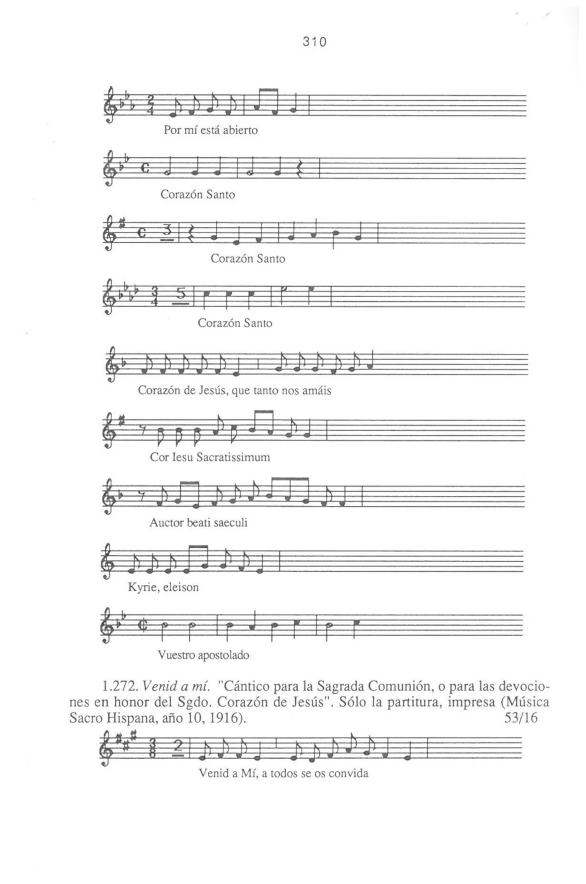

In [ ]:
img = cv2.imread('Fotos/pag310.jpg')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
fig, ax = plt.subplots(1,1,figsize=(16,16))
ax.imshow(img,cmap=plt.cm.binary)
ax.axis('off')
ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
plt.show()

## Detectando pentagramas

- **Código**

In [ ]:
 gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
 _,gray = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)
 kernel = np.ones((3,1))
 gray = cv2.dilate(gray,kernel,iterations=5)
 cnts,_ = cv2.findContours(gray, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
 for c in cnts:
   area = cv2.contourArea(c)
   if area > 10000:
     x,y,w,h = cv2.boundingRect(c)
     cv2.rectangle(img, (x, y), (x + w, y + h), (119, 90, 17), 2)

- **Resultado**

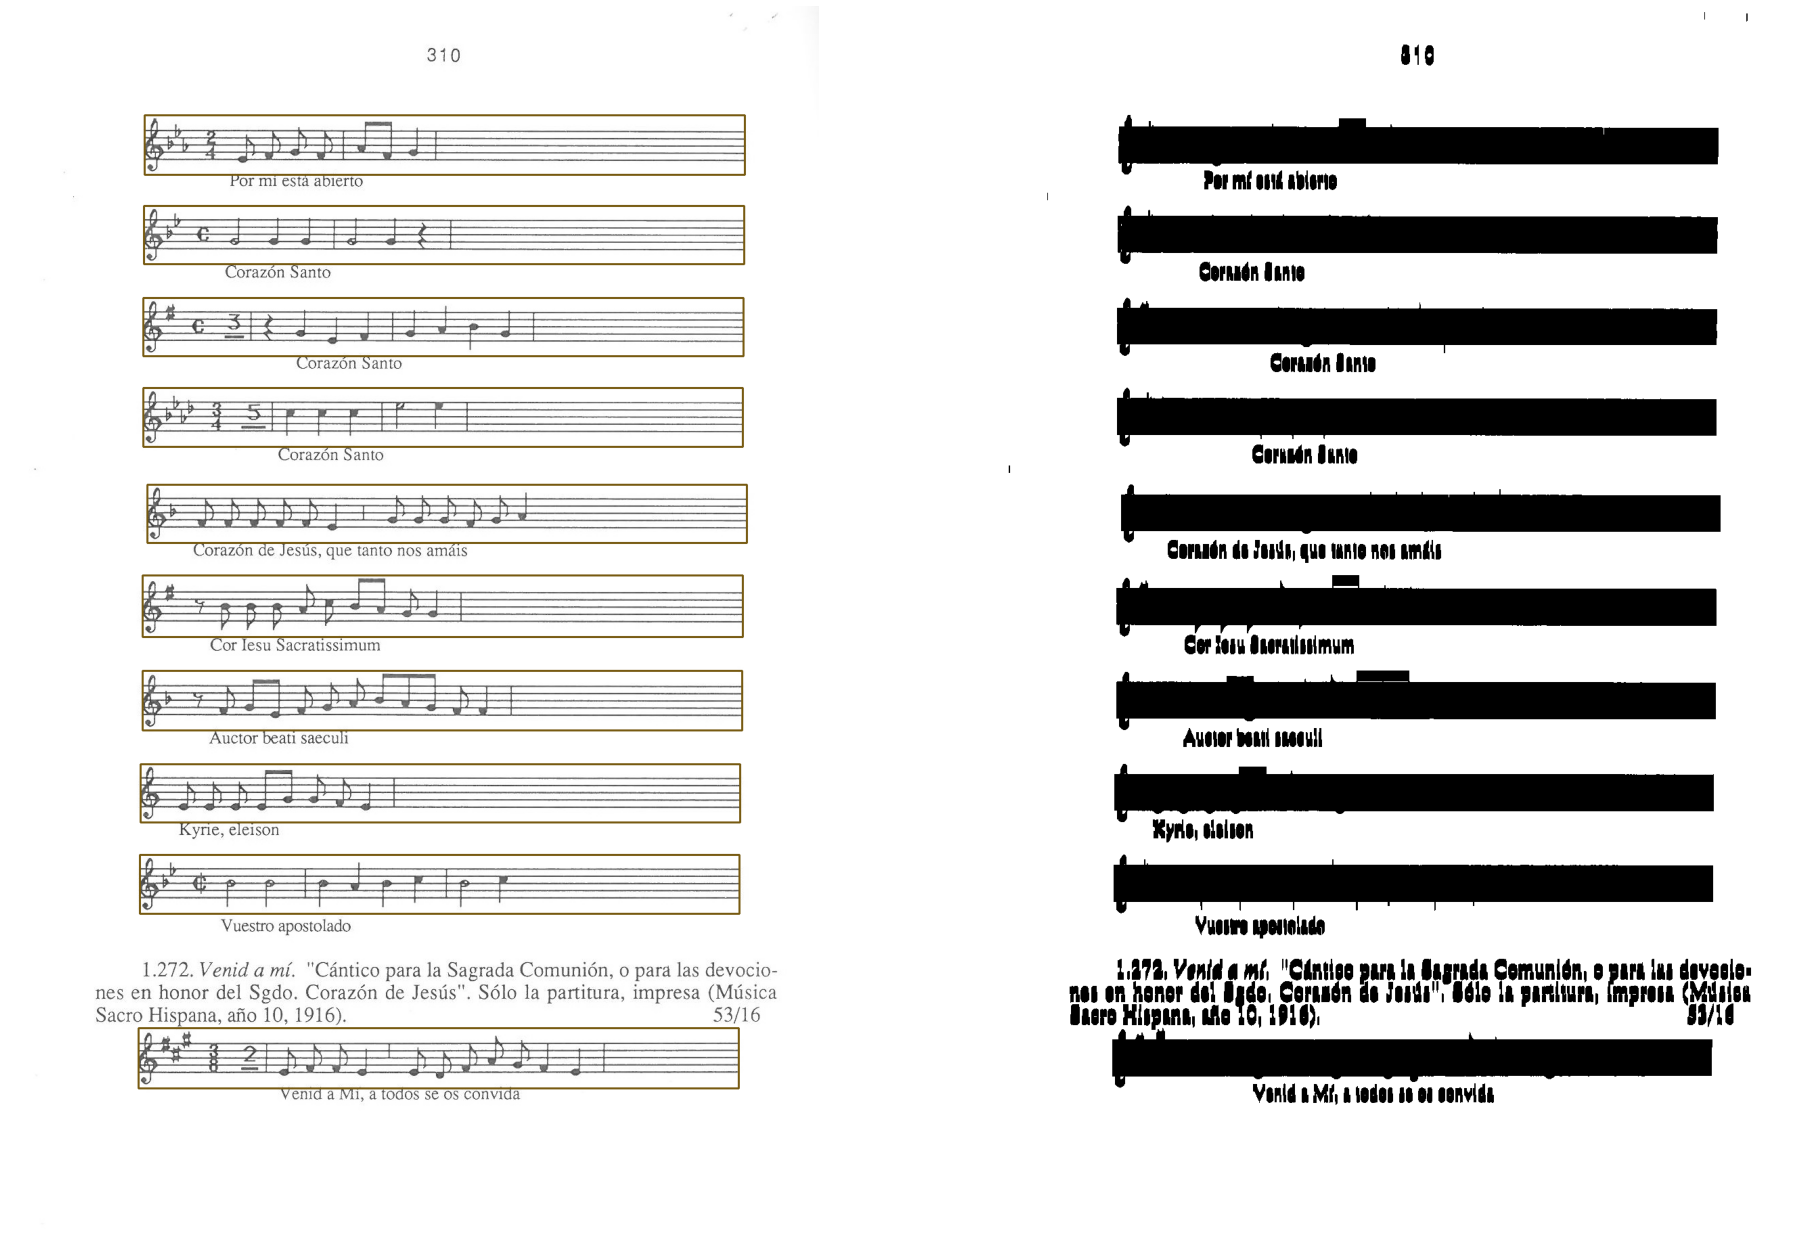

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(32,32))
ax[0].imshow(img,cmap=plt.cm.binary)
ax[0].axis('off')
ax[0].xaxis.set_ticklabels([])
ax[0].yaxis.set_ticklabels([])
ax[1].imshow(gray,cmap=plt.cm.binary)
ax[1].axis('off')
ax[1].xaxis.set_ticklabels([])
ax[1].yaxis.set_ticklabels([])
plt.show()

## Detectando bloques de texto

In [ ]:
img = cv2.imread('Fotos/pag310.jpg')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

- **Código**

In [ ]:
 gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY) # Código de antes pero para borrar pentagrama
 _,gray = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)
 kernel = np.ones((3,1))
 gray = cv2.dilate(gray,kernel,iterations=5)
 cnts,_ = cv2.findContours(gray, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
 gray = img.copy()
 for c in cnts:
   area = cv2.contourArea(c)
   if area > 10000:
     x,y,w,h = cv2.boundingRect(c)
     cv2.rectangle(gray, (x, y), (x + w, y + h), (255,255,255), -1)

gray = cv2.cvtColor(gray,cv2.COLOR_RGB2GRAY)
_,gray = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)
rectKernel=cv2.getStructuringElement(cv2.MORPH_RECT,(30,30))
gray=cv2.morphologyEx(gray,cv2.MORPH_CLOSE,rectKernel)
cnts,_ = cv2.findContours(gray, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
for c in cnts:
  area = cv2.contourArea(c)
  if(area > 100):
    (x, y, w, h) = cv2.boundingRect(c) # Mejor sacar el rectángulo contenido
    cv2.rectangle(img, (x, y-3), (x + w, y + h+3), (119, 90, 17), 2)

- **Resultado**

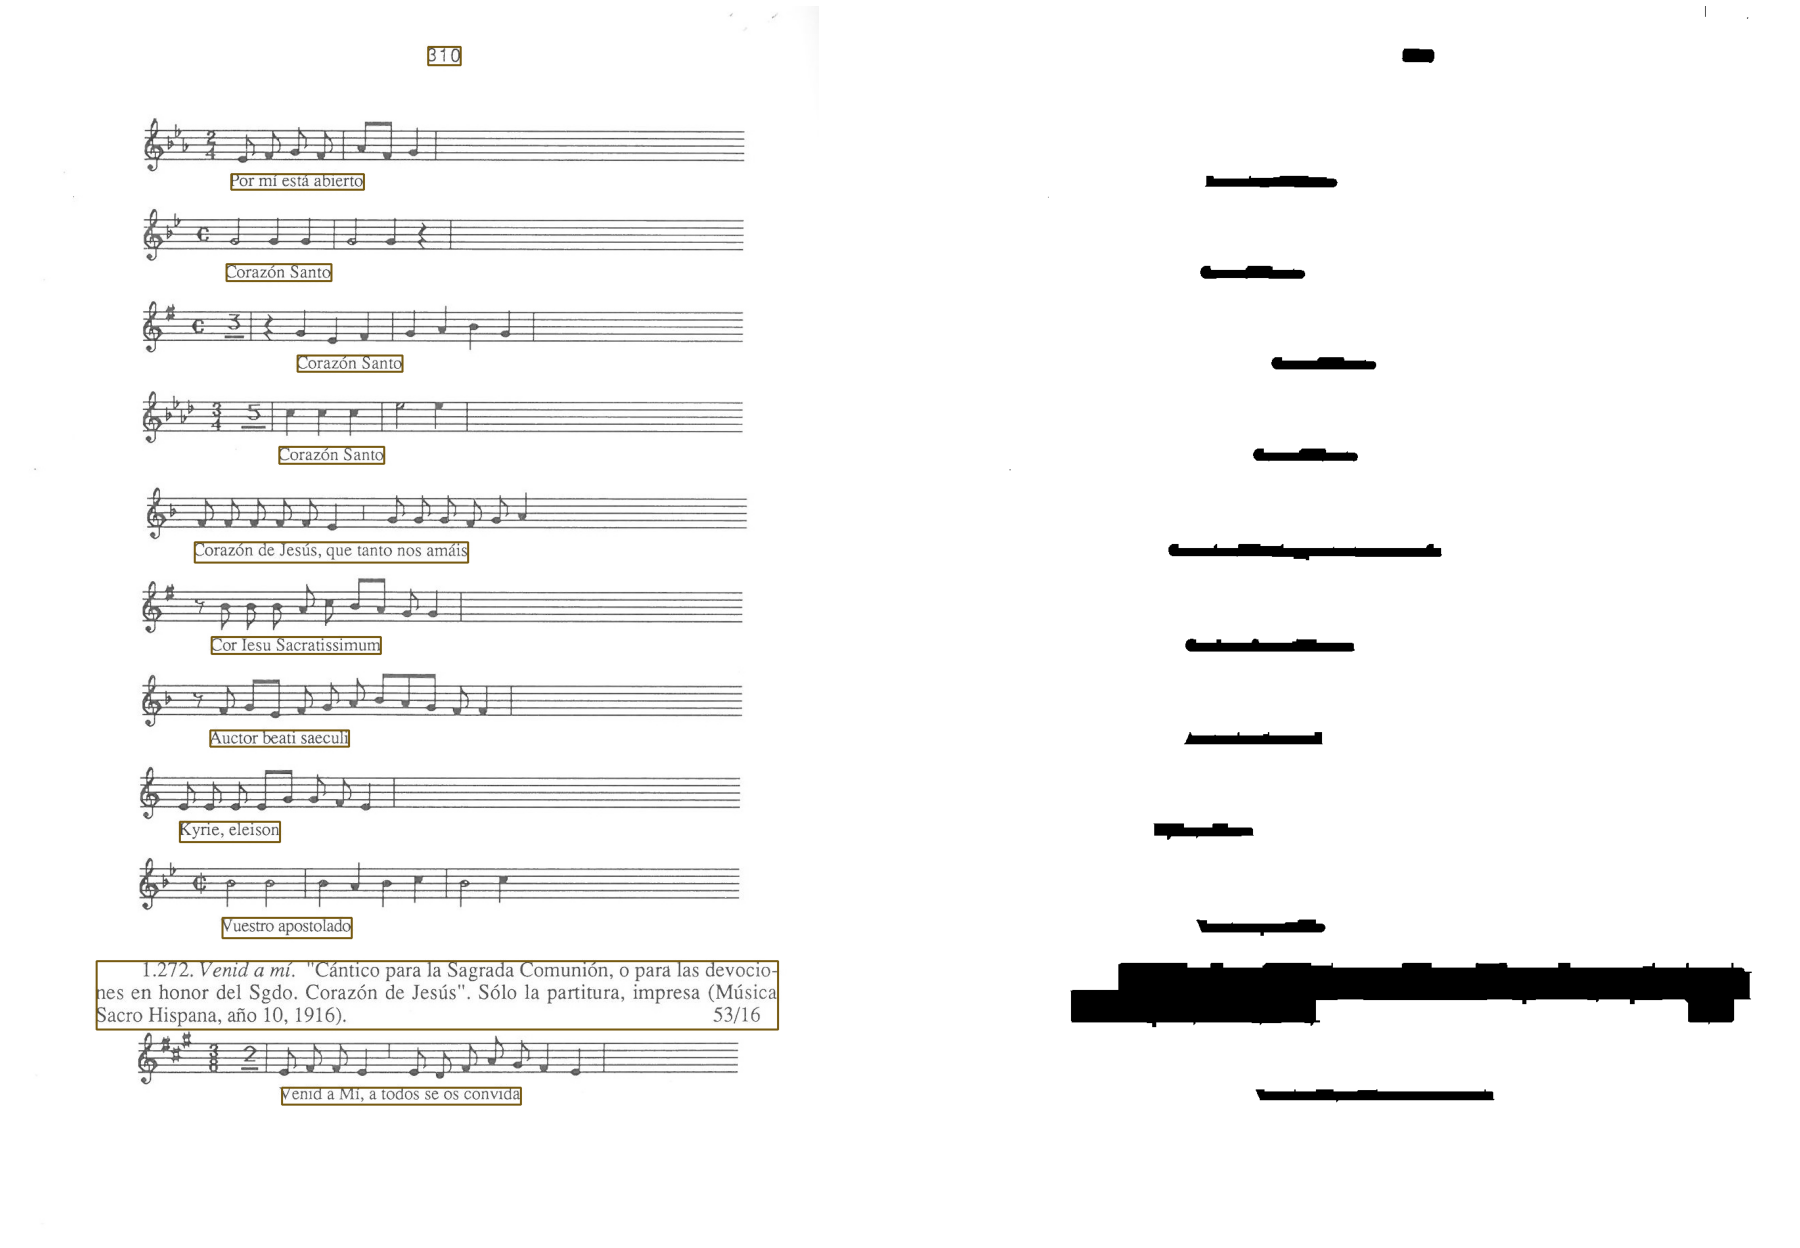

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(32,32))
ax[0].imshow(img,cmap=plt.cm.binary)
ax[0].axis('off')
ax[0].xaxis.set_ticklabels([])
ax[0].yaxis.set_ticklabels([])
ax[1].imshow(gray,cmap=plt.cm.binary)
ax[1].axis('off')
ax[1].xaxis.set_ticklabels([])
ax[1].yaxis.set_ticklabels([])
plt.show()

## Detectando símbolos musicales dentro de las canciones

In [ ]:
img = cv2.imread('Fotos/pag310.jpg')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

### Borrando texto utilizando lo anterior

- **Código**

In [ ]:
 gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY) # Código de antes pero para borrar texto
 _,gray = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)
 kernel = np.ones((3,1))
 gray = cv2.dilate(gray,kernel,iterations=5)
 cnts,_ = cv2.findContours(gray, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
 gray = img.copy()
 for c in cnts:
   area = cv2.contourArea(c)
   if area > 10000:
     x,y,w,h = cv2.boundingRect(c)
     cv2.rectangle(gray, (x, y), (x + w, y + h), (255,255,255), -1)

gray = cv2.cvtColor(gray,cv2.COLOR_RGB2GRAY)
_,gray = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)
rectKernel=cv2.getStructuringElement(cv2.MORPH_RECT,(30,30))
gray=cv2.morphologyEx(gray,cv2.MORPH_CLOSE,rectKernel)
cnts,_ = cv2.findContours(gray, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
for c in cnts:
  area = cv2.contourArea(c)
  if(area > 100):
    (x, y, w, h) = cv2.boundingRect(c) # Mejor sacar el rectángulo contenido
    cv2.rectangle(img, (x, y-3), (x + w, y + h+3), (255,255,255), -1)

- **Resultado**

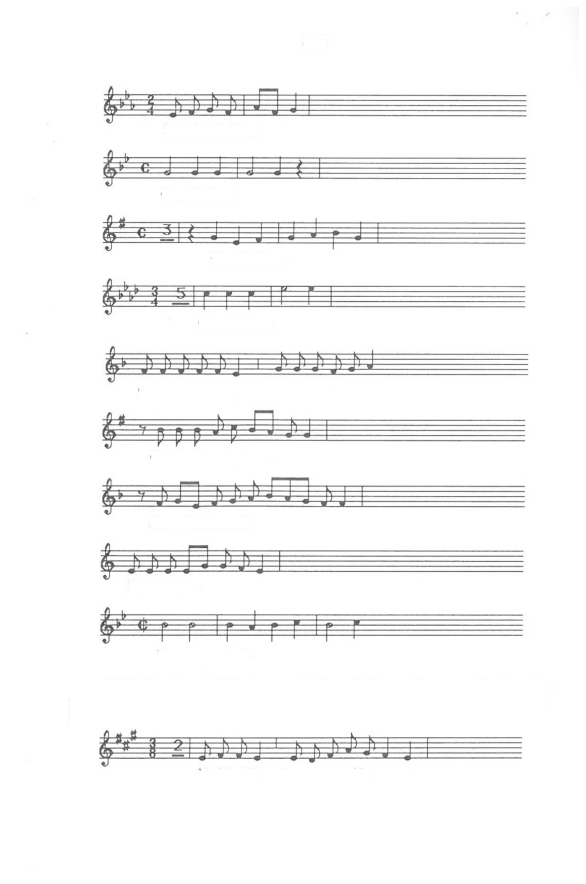

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(16,16))
ax.imshow(img,cmap=plt.cm.binary)
ax.axis('off')
ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
plt.show()

### Cogiendo un pentagrama musical como ejemplo
- Vamos a tomar el primero

In [ ]:
gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
_,gray = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)
kernel = np.ones((3,1))
gray = cv2.dilate(gray,kernel,iterations=5)
cnts,_ = cv2.findContours(gray, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
c = [c for c in cnts if cv2.contourArea(c)>10000][-1]
x,y,w,h = cv2.boundingRect(c)
img = img[y:y+h,x:x+w]

- **Resultado**

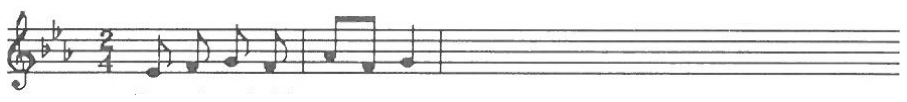

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(16,16))
ax.imshow(img,cmap=plt.cm.binary)
ax.axis('off')
ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
plt.show()

### Localizando las líneas

- **Código**

In [ ]:
gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
_,gray = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)
kernel = np.ones((1,50))
gray = cv2.erode(gray,kernel)
kernel = np.ones((1,500))
gray = cv2.morphologyEx(gray,cv2.MORPH_CLOSE,kernel)

- **Resultado**

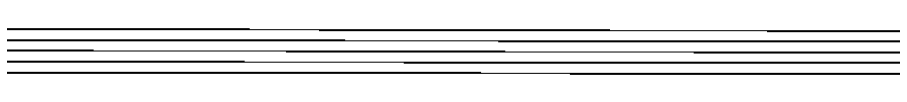

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(16,16))
ax.imshow(gray,cmap=plt.cm.binary)
ax.axis('off')
ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
plt.show()

### Borrando las líneas

#### Primera posibilidad
- Muy intuitiva

- **Código**

In [ ]:
gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
_,gray = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)
kernel = np.ones((3,1))
gray = cv2.morphologyEx(gray,cv2.MORPH_OPEN,kernel)
kernel = np.ones((3,2))
gray = cv2.morphologyEx(gray,cv2.MORPH_CLOSE,kernel)

- **Resultado**

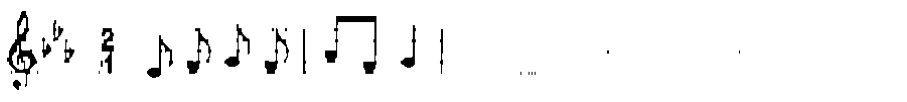

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(16,16))
ax.imshow(gray,cmap=plt.cm.binary)
ax.axis('off')
ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
plt.show()

#### Segunda posibilidad
- Un poco más enrevesada

- **Código**

In [ ]:
gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
_,gray = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)

# Operaciones morfológicas

kernel = np.ones((1,100))
gray = cv2.morphologyEx(gray,cv2.MORPH_TOPHAT,kernel)
kernel = np.ones((2,1))
gray = cv2.erode(gray,kernel)
kernel = np.ones((5,2))
gray = cv2.morphologyEx(gray,cv2.MORPH_CLOSE,kernel)
kernel = np.ones((2,3))
gray = cv2.dilate(gray,kernel)
kernel = np.ones((4,2))
gray[:,50:] = cv2.morphologyEx(gray[:,50:],cv2.MORPH_CLOSE,kernel)

# Eliminación de componentes pequeñas

nb_components, output, stats, centroids = cv2.connectedComponentsWithStats(gray, connectivity=8)
sizes = stats[1:, -1]; nb_components = nb_components - 1
min_size = 10 
gray = np.zeros((output.shape),dtype='uint8')
for i in range(0, nb_components):
    if sizes[i] >= min_size:
        gray[output == i + 1] = 255

- **Resultado**

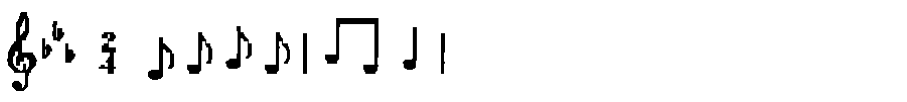

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(16,16))
ax.imshow(gray,cmap=plt.cm.binary)
ax.axis('off')
ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
plt.show()

#### Mostrando imagen original e imagen transformada

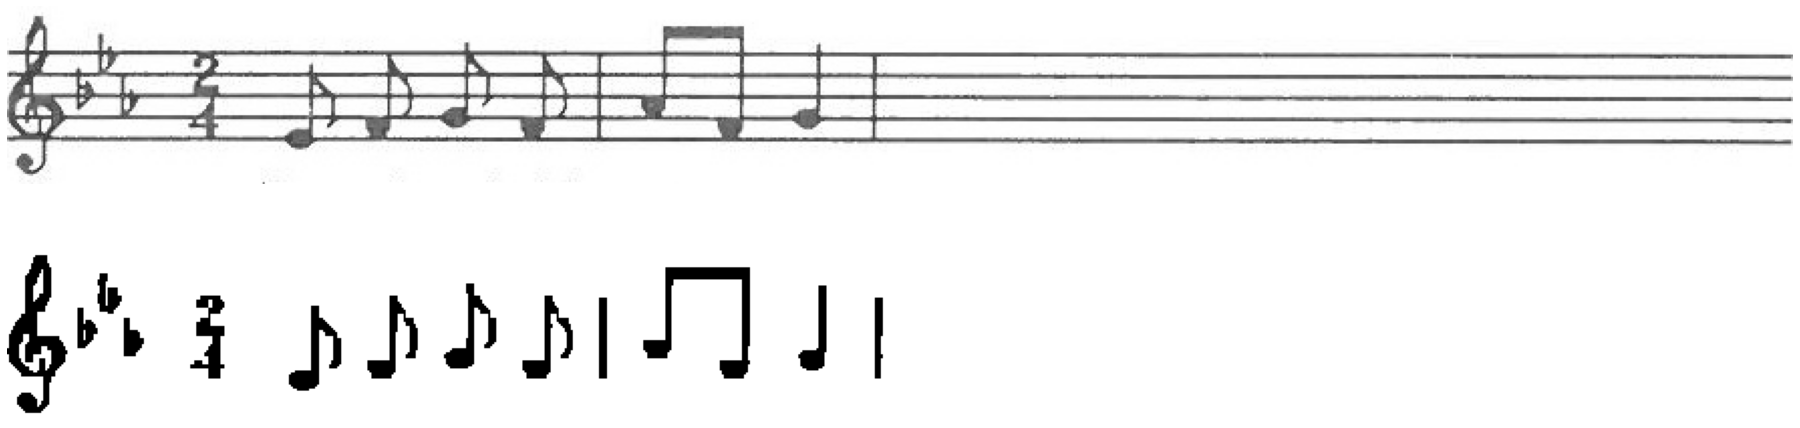

In [ ]:
fig, ax = plt.subplots(2,1,figsize=(32,8))
ax[0].imshow(img,cmap=plt.cm.binary)
ax[0].axis('off')
ax[0].xaxis.set_ticklabels([])
ax[0].yaxis.set_ticklabels([])
ax[1].imshow(gray,cmap=plt.cm.binary)
ax[1].axis('off')
ax[1].xaxis.set_ticklabels([])
ax[1].yaxis.set_ticklabels([])
plt.show()

### Calculando descriptores

#### Comenzamos detectando los contornos
- Esto nos va a servir para localizar todas las figuras dentro del pentagrama

- **Código**

In [ ]:
img2 = img.copy()
cnts,_ = cv2.findContours(gray, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
for c in cnts:
  (x, y, w, h) = cv2.boundingRect(c)
  cv2.rectangle(img2, (x-3, y-3), (x + w+3, y + h+3), (255, 0, 255), 1)

- **Resultado**

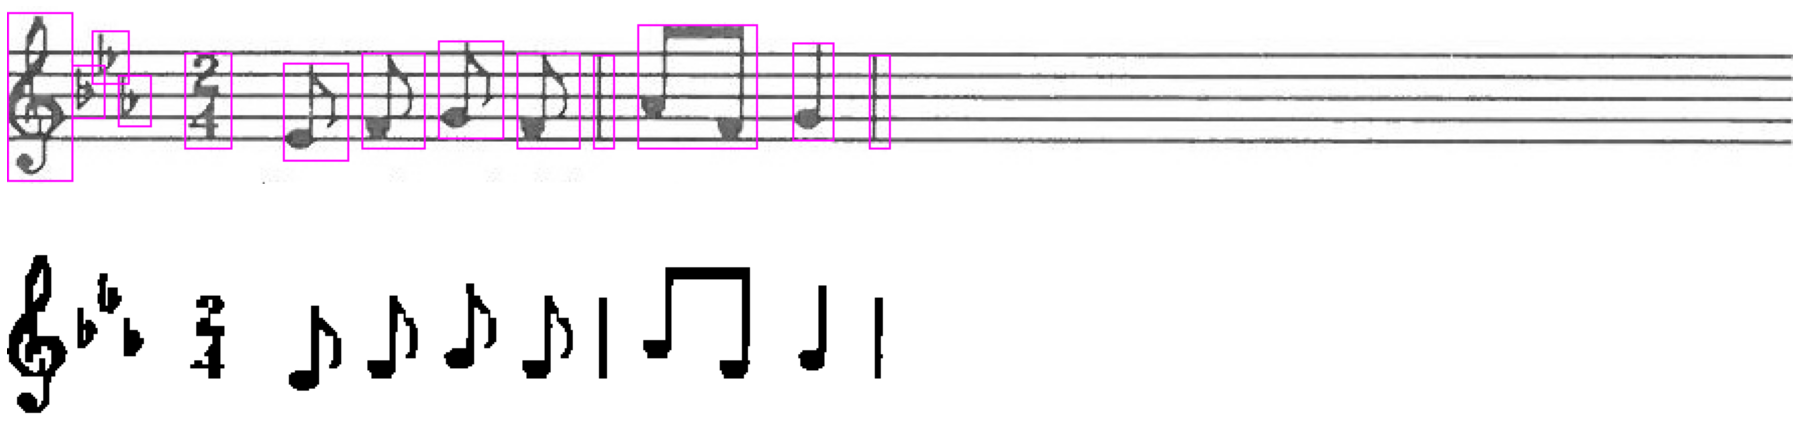

In [ ]:
fig, ax = plt.subplots(2,1,figsize=(32,8))
ax[0].imshow(img2,cmap=plt.cm.binary)
ax[0].axis('off')
ax[0].xaxis.set_ticklabels([])
ax[0].yaxis.set_ticklabels([])
ax[1].imshow(gray,cmap=plt.cm.binary)
ax[1].axis('off')
ax[1].xaxis.set_ticklabels([])
ax[1].yaxis.set_ticklabels([])
plt.show()

#### Determinando algunas propiedades
- https://docs.opencv.org/master/dd/d49/tutorial_py_contour_features.html
- https://docs.opencv.org/master/da/dc1/tutorial_js_contour_properties.html

In [ ]:
def qsort(cnts): # ordenadar contornos por coordenada x
  if cnts == []:
    return cnts
  c0 = cnts[0]
  x,_,_,_ = cv2.boundingRect(c0)
  cntsL = qsort([c for c in cnts[1:] if cv2.boundingRect(c)[0]<x])
  cntsU = qsort([c for c in cnts[1:] if cv2.boundingRect(c)[0]>=x])

  return cntsL + [c0] + cntsU

- **Característica de Euler** 

In [ ]:
def euler_number(foto):
  cnts,_ = cv2.findContours(foto,cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)
  return 2 - len(cnts) # Todos tienen una componente conexa

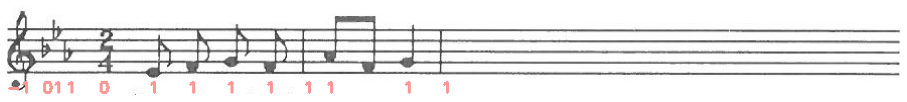

In [ ]:
img2 = img.copy()
cnts,_ = cv2.findContours(gray, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = qsort(cnts)
for c in cnts:
  (x, y, w, h) = cv2.boundingRect(c)
  n = euler_number(gray[y:y+h,x:x+w])
  cv2.putText(img2, str(n), (x, 85), cv2.FONT_HERSHEY_SIMPLEX,0.5, (255, 150, 150), 2)
fig, ax = plt.subplots(1,1,figsize=(16,16))
ax.imshow(img2,cmap=plt.cm.binary)
ax.axis('off')
ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
plt.show()

- **Alto**

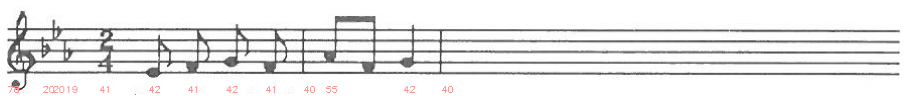

In [ ]:
img2 = img.copy()
cnts,_ = cv2.findContours(gray, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = qsort(cnts)
for c in cnts:
  (x, y, w, h) = cv2.boundingRect(c)
  n = h
  cv2.putText(img2, str(n), (x, 85), cv2.FONT_HERSHEY_SIMPLEX,0.3, (255, 150, 150), 1)
fig, ax = plt.subplots(1,1,figsize=(16,16))
ax.imshow(img2,cmap=plt.cm.binary)
ax.axis('off')
ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
plt.show()

- **Ancho**

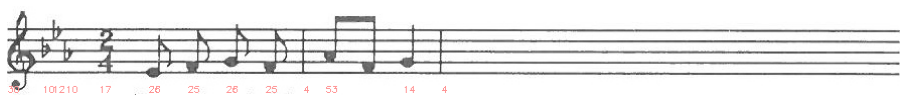

In [ ]:
img2 = img.copy()
cnts,_ = cv2.findContours(gray, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = qsort(cnts)
for c in cnts:
  (x, y, w, h) = cv2.boundingRect(c)
  n = w
  cv2.putText(img2, str(n), (x, 85), cv2.FONT_HERSHEY_SIMPLEX,0.3, (255, 150, 150), 1)
fig, ax = plt.subplots(1,1,figsize=(16,16))
ax.imshow(img2,cmap=plt.cm.binary)
ax.axis('off')
ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
plt.show()

- **Área**

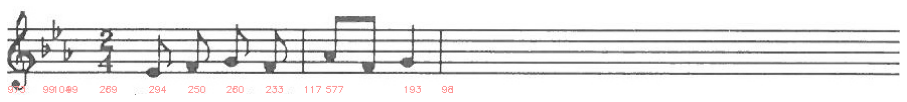

In [ ]:
img2 = img.copy()
cnts,_ = cv2.findContours(gray, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = qsort(cnts)
for c in cnts:
  (x, y, w, h) = cv2.boundingRect(c)
  n = int(cv2.contourArea(c))
  cv2.putText(img2, str(n), (x, 85), cv2.FONT_HERSHEY_SIMPLEX,0.3, (255, 150, 150), 1)
fig, ax = plt.subplots(1,1,figsize=(16,16))
ax.imshow(img2,cmap=plt.cm.binary)
ax.axis('off')
ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
plt.show()

- **Perímetro**

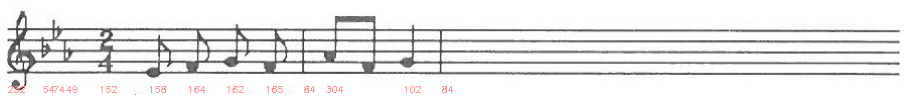

In [ ]:
img2 = img.copy()
cnts,_ = cv2.findContours(gray, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = qsort(cnts)
for c in cnts:
  (x, y, w, h) = cv2.boundingRect(c)
  n = int(cv2.arcLength(c,True))
  cv2.putText(img2, str(n), (x, 85), cv2.FONT_HERSHEY_SIMPLEX,0.3, (255, 150, 150), 1)
fig, ax = plt.subplots(1,1,figsize=(16,16))
ax.imshow(img2,cmap=plt.cm.binary)
ax.axis('off')
ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
plt.show()

- **Menor polígono convexo contenedor del contorno (hull)**
  - hull_area
  - hull_longitud
  - solidity = area/hull_area


Vamos a mostrar, por ejmplo, la **solidity**.


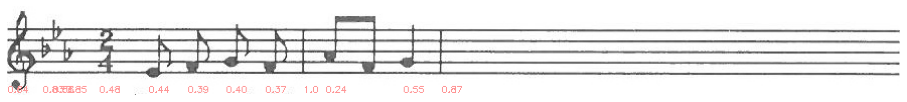

In [ ]:
img2 = img.copy()
cnts,_ = cv2.findContours(gray, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = qsort(cnts)
for c in cnts:
  (x, y, w, h) = cv2.boundingRect(c)
  hull = cv2.convexHull(c)
  area = cv2.contourArea(c)
  hullArea = cv2.contourArea(hull)
  n = str(area/hullArea)[:4]
  cv2.putText(img2, str(n), (x, 85), cv2.FONT_HERSHEY_SIMPLEX,0.3, (255, 150, 150), 1)
fig, ax = plt.subplots(1,1,figsize=(16,16))
ax.imshow(img2,cmap=plt.cm.binary)
ax.axis('off')
ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
plt.show()

- **AspectRatio**

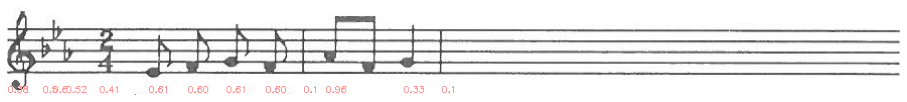

In [ ]:
img2 = img.copy()
cnts,_ = cv2.findContours(gray, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = qsort(cnts)
for c in cnts:
  (x, y, w, h) = cv2.boundingRect(c)
  n = str(w/h)[:4]
  cv2.putText(img2, str(n), (x, 85), cv2.FONT_HERSHEY_SIMPLEX,0.3, (255, 150, 150), 1)
fig, ax = plt.subplots(1,1,figsize=(16,16))
ax.imshow(img2,cmap=plt.cm.binary)
ax.axis('off')
ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
plt.show()

- **Extent**

  Parecido a la Solidity

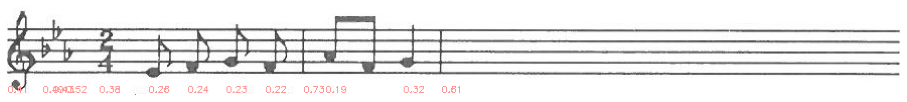

In [ ]:
img2 = img.copy()
cnts,_ = cv2.findContours(gray, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = qsort(cnts)
for c in cnts:
  (x, y, w, h) = cv2.boundingRect(c)
  area = cv2.contourArea(c)
  n = str(area/float(w * h))[:4]
  cv2.putText(img2, str(n), (x, 85), cv2.FONT_HERSHEY_SIMPLEX,0.3, (255, 150, 150), 1)
fig, ax = plt.subplots(1,1,figsize=(16,16))
ax.imshow(img2,cmap=plt.cm.binary)
ax.axis('off')
ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
plt.show()

#### Clasificando símbolos

In [ ]:
img2 = img.copy()
cnts,_ = cv2.findContours(gray, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = qsort(cnts)

In [ ]:
Descriptores = []
for c in cnts:
 
 # Propiedades

  hull = cv2.convexHull(c)
  (x, y, w, h) = cv2.boundingRect(c)
  alto = h
  ancho = w
  euler = euler_number(gray[y:y+h,x:x+w])
  area = cv2.contourArea(c)
  perim = cv2.arcLength(c,True)
  solidity = area/cv2.contourArea(hull)
  longildity = perim/cv2.arcLength(hull,True)
  AspectRatio = w/h
  extent = area/float(w*h)
  extentL = perim/float(2*h+2*w)

  # Vector de descriptores

  #descriptor = [alto,ancho,euler,area,perim,solidity,longildity,AspectRatio,extent,extentL]
  descriptor = [euler,solidity,ancho,alto] # Mejores características
  Descriptores.append(descriptor)
Descriptores = np.array(Descriptores)
print(len(Descriptores))

13


In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=7,random_state=1).fit(Descriptores)

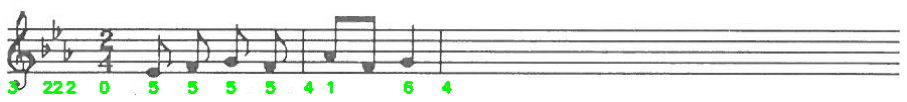

In [ ]:
for i in range(0,len(cnts)):
  (x, y, w, h) = cv2.boundingRect(cnts[i])
  l = kmeans.labels_[i]
  cv2.putText(img2, str(l), (x, 85), cv2.FONT_HERSHEY_SIMPLEX,0.5, (0, 255, 0), 2)
fig, ax = plt.subplots(1,1,figsize=(16,16))
ax.imshow(img2,cmap=plt.cm.binary)
ax.axis('off')
ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
plt.show()

- Si tomamos el vector completo de características el resultado es el siguiente

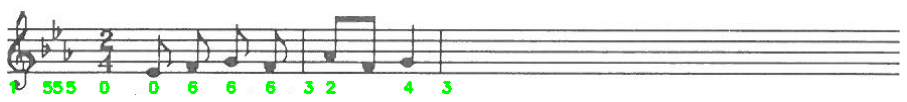

In [ ]:
Descriptores = []
for c in cnts:
 
 # Propiedades

  hull = cv2.convexHull(c)
  (x, y, w, h) = cv2.boundingRect(c)
  alto = h
  ancho = w
  euler = euler_number(gray[y:y+h,x:x+w])
  area = cv2.contourArea(c)
  perim = cv2.arcLength(c,True)
  solidity = area/cv2.contourArea(hull)
  longildity = perim/cv2.arcLength(hull,True)
  AspectRatio = w/h
  extent = area/float(w*h)
  extentL = perim/float(2*h+2*w)

  # Vector de descriptores

  descriptor = [alto,ancho,euler,area,perim,solidity,longildity,AspectRatio,extent,extentL]
  Descriptores.append(descriptor)
Descriptores = np.array(Descriptores)

kmeans = KMeans(n_clusters=7,random_state=1).fit(Descriptores)
img2 = img.copy()
for i in range(0,len(cnts)):
  (x, y, w, h) = cv2.boundingRect(cnts[i])
  l = kmeans.labels_[i]
  cv2.putText(img2, str(l), (x, 85), cv2.FONT_HERSHEY_SIMPLEX,0.5, (0, 255, 0), 2)
fig, ax = plt.subplots(1,1,figsize=(16,16))
ax.imshow(img2,cmap=plt.cm.binary)
ax.axis('off')
ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
plt.show()

- No lo hace del todo mal pero se equivoca en uno. No siempre más características implica mejores resultados.

#### Determinando la altura de las notas
- Nos vamos a ayudar de los centros de masa de las figuras y de las líneas

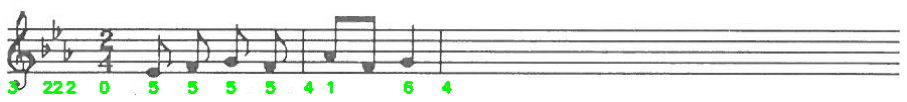

In [ ]:
for i in range(0,len(cnts)):
  (x, y, w, h) = cv2.boundingRect(cnts[i])
  l = kmeans.labels_[i]
  cv2.putText(img2, str(l), (x, 85), cv2.FONT_HERSHEY_SIMPLEX,0.5, (0, 255, 0), 2)
fig, ax = plt.subplots(1,1,figsize=(16,16))
ax.imshow(img2,cmap=plt.cm.binary)
ax.axis('off')
ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
plt.show()

- **Coordenadas de las bolitas**

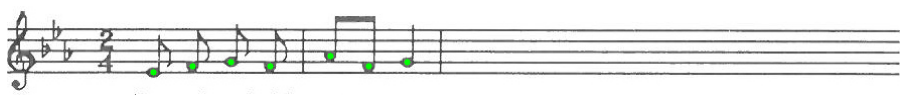

In [ ]:
img2 = img.copy()
k = 0
for c in cnts:
  l = kmeans.labels_[k]
  if l == 5:
    M = cv2.moments(c)
    cX = int(M["m10"] / M["m00"])
    cY = int(M["m01"] / M["m00"])
    cv2.circle(img2, (cX-7, cY+10), 3, (0, 255, 0), -1)
  if l == 6:
    M = cv2.moments(c)
    cX = int(M["m10"] / M["m00"])
    cY = int(M["m01"] / M["m00"])
    cv2.circle(img2, (cX-4, cY+8), 3, (0, 255, 0), -1)
  if l == 1:
    x,y,w,h = cv2.boundingRect(c)
    kernel = np.ones((8,1))
    corcheas = cv2.morphologyEx(gray[:,x-3:x+w+3],cv2.MORPH_ELLIPSE,kernel)
    kernel = np.ones((1,3))
    corcheas = cv2.erode(corcheas,kernel,iterations=2)
    cnts2,_ = cv2.findContours(corcheas, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts2 = qsort(cnts2)
    for c in cnts2:
      M = cv2.moments(c)
      cX = int(M["m10"] / M["m00"])+x-3
      cY = int(M["m01"] / M["m00"])
      cv2.circle(img2, (cX-2, cY-3), 3, (0, 255, 0), -1)
  k+=1
fig, ax = plt.subplots(1,1,figsize=(16,16))
ax.imshow(img2,cmap=plt.cm.binary)
ax.axis('off')
ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
plt.show()

- **Las diferentes alturas**

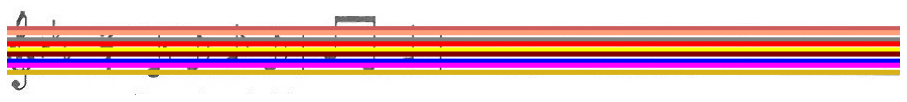

In [ ]:
img2 = img.copy()
colores = [(205, 92, 92),(255, 160, 122),(128, 128, 128),(255, 0, 0),(255, 255, 0),(128, 0, 0),(0, 0, 255),(255, 0, 255),(215, 177, 22)]
lineas = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
_,lineas = cv2.threshold(lineas, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)
kernel = np.ones((1,50))
lineas = cv2.erode(lineas,kernel)
kernel = np.ones((1,500))
lineas = cv2.morphologyEx(lineas,cv2.MORPH_CLOSE,kernel)
cnts,_ = cv2.findContours(lineas, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[::-1]
altura = int(np.mean([cv2.boundingRect(cnts[i+1])[1]-cv2.boundingRect(cnts[i])[1] for i in range(0,len(cnts)-1)])/4)
coordenadas = {}
k = 0
for c in cnts:
  x,y,w,h = cv2.boundingRect(c)
  cv2.rectangle(img2, (0, y-altura), (img2.shape[1], y + altura), colores[k], -1)
  coordenadas[k] = [y-altura,y+altura]
  k+=1
  if k == 9: break
  cv2.rectangle(img2, (0, y+altura), (img2.shape[1], y + 3*altura), colores[k], -1)
  coordenadas[k] = [y+altura,y+3*altura]
  k+=1
fig, ax = plt.subplots(1,1,figsize=(16,16))
ax.imshow(img2,cmap=plt.cm.binary)
ax.axis('off')
ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
plt.show()

- Juntando estas dos cosas:

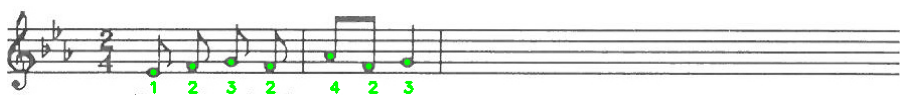

In [ ]:
img2 = img.copy()
cnts,_ = cv2.findContours(gray, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = qsort(cnts)
k = 0
for c in cnts:
  x,y,w,h = cv2.boundingRect(c)
  l = kmeans.labels_[k]
  if l == 5:
    M = cv2.moments(c)
    cX = int(M["m10"] / M["m00"])
    cY = int(M["m01"] / M["m00"])
    cv2.circle(img2, (cX-7, cY+10), 3, (0, 255, 0), -1)
    for i in range(0,9):
      if coordenadas[i][0] <= cY+10 <= coordenadas[i][1]:
        cv2.putText(img2, str(9-i), (x, 85), cv2.FONT_HERSHEY_SIMPLEX,0.5, (0, 255, 0), 2)
        break
  if l == 6:
    M = cv2.moments(c)
    cX = int(M["m10"] / M["m00"])
    cY = int(M["m01"] / M["m00"])
    cv2.circle(img2, (cX-4, cY+8), 3, (0, 255, 0), -1)
    for i in range(0,9):
      if coordenadas[i][0] <= cY+8 <= coordenadas[i][1]:
        cv2.putText(img2, str(9-i), (x, 85), cv2.FONT_HERSHEY_SIMPLEX,0.5, (0, 255, 0), 2)
        break
  if l == 1:
    x,y,w,h = cv2.boundingRect(c)
    kernel = np.ones((8,1))
    corcheas = cv2.morphologyEx(gray[:,x-3:x+w+3],cv2.MORPH_ELLIPSE,kernel)
    kernel = np.ones((1,3))
    corcheas = cv2.erode(corcheas,kernel,iterations=2)
    cnts2,_ = cv2.findContours(corcheas, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts2 = qsort(cnts2)
    for c in cnts2:
      x1,y1,w1,h1 = cv2.boundingRect(c)
      M = cv2.moments(c)
      cX = int(M["m10"] / M["m00"])+x-3
      cY = int(M["m01"] / M["m00"])
      cv2.circle(img2, (cX-2, cY-3), 3, (0, 255, 0), -1)
      for i in range(0,9):
        if coordenadas[i][0] <= cY-3 <= coordenadas[i][1]:
          cv2.putText(img2, str(9-i), (x1+x-3, 85), cv2.FONT_HERSHEY_SIMPLEX,0.5, (0, 255, 0), 2)
          break
  k+=1
fig, ax = plt.subplots(1,1,figsize=(16,16))
ax.imshow(img2,cmap=plt.cm.binary)
ax.axis('off')
ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
plt.show()

### Resultado final en forma de dato estructurado

In [ ]:
nombres = {3:'Clave de Sol',2:'bemol',0:'2x4',5:'corchea', 1: 'corcheas_2', 4:'linea',6:'negra'}
alturas = {1:'Mi',2:'Fa',3:'Sol',4:'La',5:'Si',6:'Do',7:'Re',8:'Mi',9:'Fa'}

In [ ]:
img2 = img.copy()
cnts,_ = cv2.findContours(gray, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = qsort(cnts)
Labels = []
k = 0
for c in cnts:
  x,y,w,h = cv2.boundingRect(c)
  l = kmeans.labels_[k]
  if l == 5:
    M = cv2.moments(c)
    cX = int(M["m10"] / M["m00"])
    cY = int(M["m01"] / M["m00"])
    for i in range(0,9):
      if coordenadas[i][0] <= cY+10 <= coordenadas[i][1]:
        nombre = nombres[l]+'_'+alturas[9-i]
        break
  if l == 6:
    M = cv2.moments(c)
    cX = int(M["m10"] / M["m00"])
    cY = int(M["m01"] / M["m00"])
    for i in range(0,9):
      if coordenadas[i][0] <= cY+8 <= coordenadas[i][1]:
        nombre = nombres[l]+'_'+alturas[9-i]
        break
  if l == 1:
    x,y,w,h = cv2.boundingRect(c)
    kernel = np.ones((8,1))
    corcheas = cv2.morphologyEx(gray[:,x-3:x+w+3],cv2.MORPH_ELLIPSE,kernel)
    kernel = np.ones((1,3))
    corcheas = cv2.erode(corcheas,kernel,iterations=2)
    cnts2,_ = cv2.findContours(corcheas, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts2 = qsort(cnts2)
    nombre = nombres[l]
    for c in cnts2:
      x1,y1,w1,h1 = cv2.boundingRect(c)
      M = cv2.moments(c)
      cX = int(M["m10"] / M["m00"])+x-3
      cY = int(M["m01"] / M["m00"])
      cv2.circle(img2, (cX-2, cY-3), 3, (0, 255, 0), -1)
      for i in range(0,9):
        if coordenadas[i][0] <= cY-3 <= coordenadas[i][1]:
          nombre = nombre+'_'+alturas[9-i]
          break
  if l in (0,2,3,4): nombre = nombres[l]
  k+=1
  Labels.append(nombre)

In [ ]:
print(Labels)

['Clave de Sol', 'bemol', 'bemol', 'bemol', '2x4', 'corchea_Mi', 'corchea_Fa', 'corchea_Sol', 'corchea_Fa', 'linea', 'corcheas_2_La_Fa', 'negra_Sol', 'linea']


## Resultado final de la detección de símbolos musicales
- **Entre muchas comillas**
- La solución final esta muy sesgada ya que solo hemos usado un pentagrama. No obstante, esta idea se puede aplicar a todos los pentagramas. Deberíamos encontrar unos descriptores y algoritmos de clasificación adecuados. Estos seguramente sean distintos que los óptimos para este pentagrama particular.

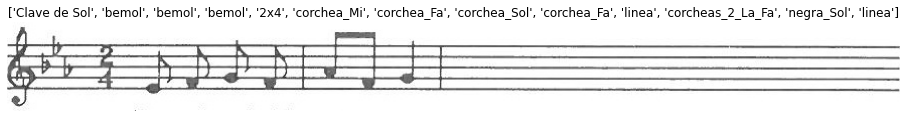

In [ ]:
img2 = img.copy()
fig, ax = plt.subplots(1,1,figsize=(16,16))
ax.imshow(img2,cmap=plt.cm.binary)
ax.axis('off')
ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.set_title(Labels)
plt.show()

## Reproduciendo el sonido
- Con los datos estructurados de esta forma seremos capaces de reproducir el sonido de la música
- Se podría definir una función que, dado un pentagrama, hiciese todos los pasos previos y con la lista resultante te devuelva el sonido. Vamos a hacerlo de forma manual para simplificar las cosas.
- http://newt.phys.unsw.edu.au/jw/notes.html

In [ ]:
def f(a=1):
  ml = [[0,a/2,63,100,'Piano'],
        [a/2,a,65,100,'Piano'],
        [a,a + a/2,67,100,'Piano'],
        [a+a/2,2*a,65,100,'Piano'],
        [2*a,2*a + a/2,68,100,'Piano'],
        [2*a+a/2,3*a,65,100,'Piano'],
        [3*a,4*a,67,100,'Piano']]
  ml = pd.DataFrame(ml, columns=['Start', 'End', 'Pitch', 'Velocity', 'Instrument'])
  instrument = pretty_midi.Instrument(program=0, is_drum=False, name="Piano")
  for i in range(0,len(ml)):
    instrument.notes.append(pretty_midi.Note(start=ml.iloc[i][0],end=ml.iloc[i][1],pitch=ml.iloc[i][2],velocity=ml.iloc[i][3]))
  fn = '/content/prueba.mid'
  midi_data = pretty_midi.PrettyMIDI(fn)
  midi_data
  midi_data = pretty_midi.PrettyMIDI(fn)
  midi_data.instruments[0] = instrument
  Fs = 22050
  audio_data = midi_data.synthesize(fs=Fs)
  return ipd.Audio(audio_data, rate=Fs)

In [ ]:
f(1)